In [98]:
import re
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
import re
import csv

# 🔧 사용자 정의: 추적할 이벤트 목록
# tracked_events = ["prepare", "Igather", "solve_reduced", "Iscatter", "solve_remain", "solve_x"]
tracked_events = ["preprocess", "alltoall-1", "tdma_many", "alltoall-2", "solve"]

# 🔧 파일 설정
input_file = "time_log.txt"
output_file = "time_parsed.csv"

# 정규식: [이벤트] elapsed: ... ns
pattern_event = re.compile(r"\[(.+?)\]\s*:\s*(\d+)\s*ms")

# 결과 리스트
records = []
current_rank = 0
event_counter = 0
events_per_rank = 0

with open(input_file, "r") as f:
    for line in f:
        line = line.strip()
        m = pattern_event.search(line)
        if m:
            label = m.group(1)
            elapsed = int(m.group(2))

            if label in tracked_events:
                records.append((current_rank, label, elapsed))
                event_counter += 1

                # 랭크 판단: 이벤트 수를 기준으로 랭크 추정
                if events_per_rank == 0 and records:
                    # 처음 들어온 이벤트로부터 한 랭크의 이벤트 개수 추정
                    events_per_rank = tracked_events.count(records[0][1])

                if events_per_rank > 0 and event_counter % events_per_rank == 0:
                    current_rank += 1

# CSV 저장
with open(output_file, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Rank", "Event", "Time_ns"])
    for r in records:
        writer.writerow(r)

print(f"[✓] CSV 파일 저장 완료: {output_file}")


[✓] CSV 파일 저장 완료: time_parsed.csv


In [94]:
data = pd.read_csv("time_parsed.csv")

ddata = np.zeros(len(tracked_events))

for i in range(len(tracked_events)):
    event_name = tracked_events[i]
    time = np.max(data["Time_ns"][data["Event"]==event_name])
    ddata[i] = time / 1e+6

#ddata
pd.DataFrame(ddata)

,0
0,0.565722
1,177.636148
2,0.014500
3,0.070139
4,0.194787


In [99]:
t_2 = np.array([1.6360382, 167.110833, 0.009478, 0.0192292, 0.1185622])
t_4 = np.array([0.7937708,
176.3361942,
0.0122346,
0.03105,
0.1590124,
])
t_8 = np.array([0.572828,
168.3202796,
0.014524,
0.141273,
0.205197,
])

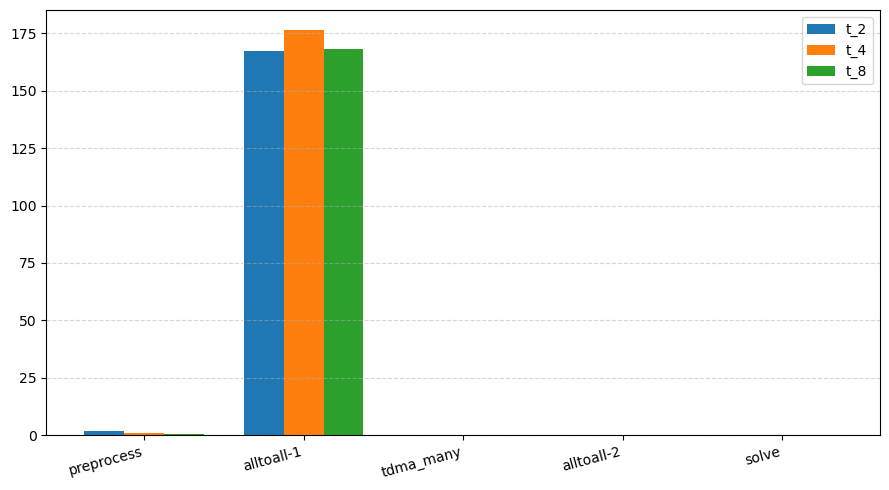

In [105]:
# Labels for each index
xx = ["preprocess", "alltoall-1", "tdma_many", "alltoall-2", "solve"]

# Ensure equal length
assert len(t_2) == len(t_4) == len(t_8) == len(xx)
n = len(xx)
idx = np.arange(n)
width = 0.25

plt.figure(figsize=(9, 5))
plt.bar(idx - width, t_2, width, label='t_2')
plt.bar(idx,         t_4, width, label='t_4')
plt.bar(idx + width, t_8, width, label='t_8')

plt.xticks(idx, xx, rotation=15, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

<BarContainer object of 3 artists>

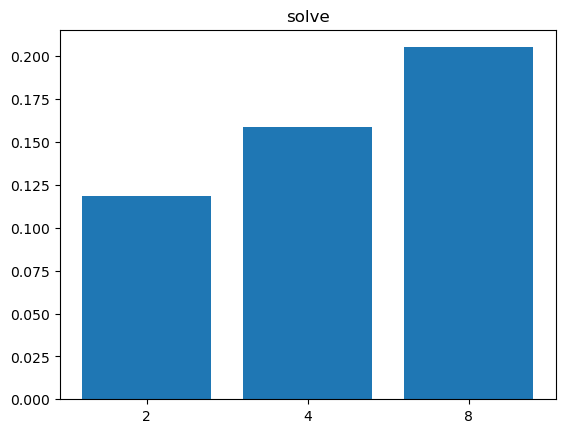

In [117]:
idx = 4
plt.title(f"{xx[idx]}")
plt.bar(["2", "4", "8"], [t_2[idx], t_4[idx], t_8[idx]])

<BarContainer object of 3 artists>

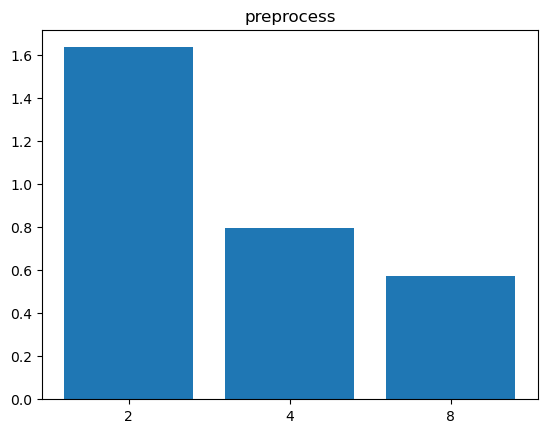

In [118]:
idx = 0
plt.title(f"{xx[idx]}")
plt.bar(["2", "4", "8"], [t_2[idx], t_4[idx], t_8[idx]])